###  print out structures

In [1]:
import random
import numpy as np
import pprint
from graphviz import Digraph

from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import Neuron, Layer, MLP
from mycrograd_debug.drawviz_debug import draw_dot, draw_nn, print_my_params

np.random.seed(1337)
random.seed(1337)
pp = pprint.PrettyPrinter(indent=4)

#### Multi Layer Perceptron 1-2-1

In [2]:
# initialize a model
nin = 1  # number of inputs
nout = 1  # number of outputs
Value.value_counter = 0

model = MLP(
    nin, [2, 2, nout], lastReLU=False, weightsinit=2, debug_bw=False
)  # 1-layer neural network
# print("parameters")
# pp.pprint(model.parameters())
# print_my_params(model)
print("layers")
pp.pprint(model.layers)
print(model.layers[0].layernumber)

xinumbers = list(range(1, 1 + nin))
xinput = [Value(x, type="i%s" % index) for index, x in enumerate(xinumbers, start=1)]
print("inputs")
pp.pprint(xinput)

activation = model(xinput)
# activation.backward()
print("activation", activation)

Module nn MLP: structure
[1, 2, 2, 1]
3
layers
[   Layer of [LinearNeuron(1), LinearNeuron(1)],
    Layer of [LinearNeuron(2), LinearNeuron(2)],
    Layer of [LinearNeuron(2)]]
L1
inputs
[   Value(name=v014,layernumber=,neuronnumber=,weightnumber=,type=i1,data=1, grad=0)]
activation Value(name=v030,layernumber=O,neuronnumber=N1,weightnumber=,type=a,data=0.9000000000000001, grad=0)


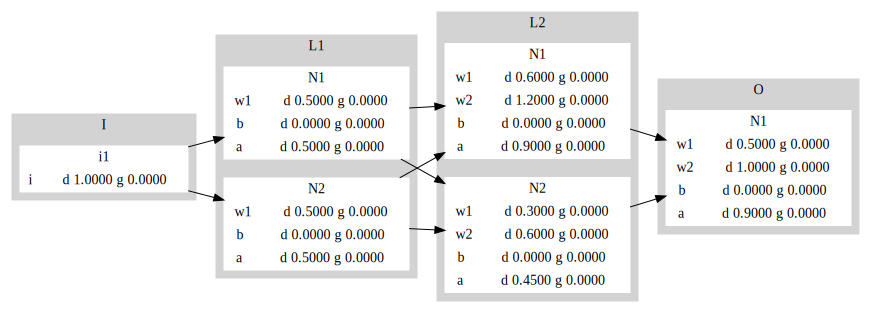

In [3]:
draw_nn(xinput, model)

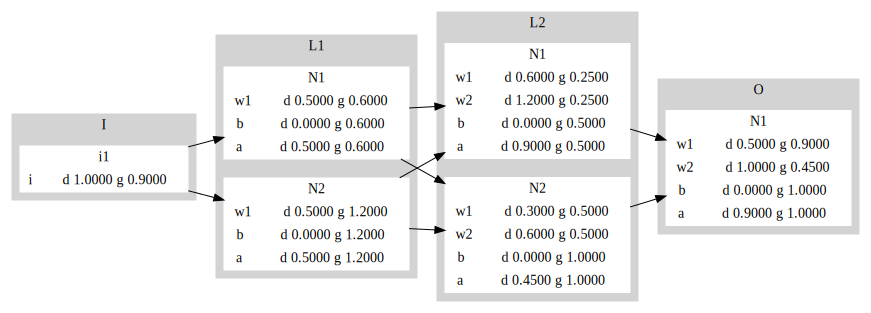

In [4]:
activation.backward()
draw_nn(xinput, model)

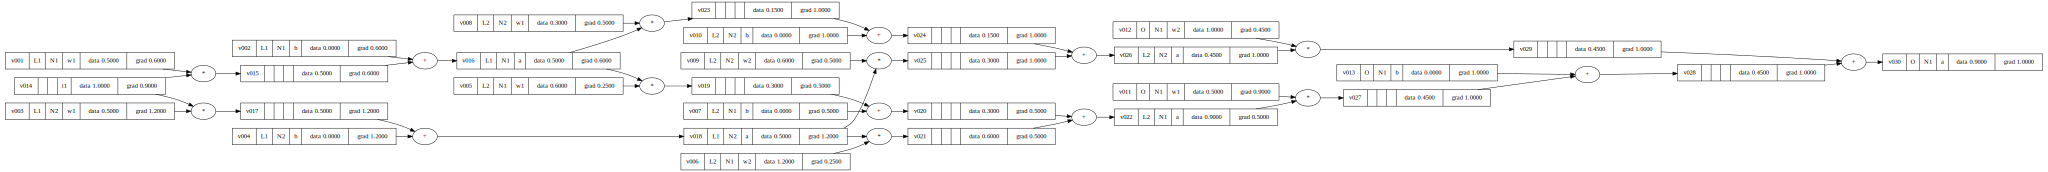

In [5]:
draw_dot(activation)

In [6]:
print(draw_dot(activation))

digraph {
	graph [rankdir=LR]
	139849830330384 [label="{ v018 |L1 |N2 |a | data 0.5000 | grad 1.2000 }" shape=record]
	"139849830330384+" [label="+"]
	"139849830330384+" -> 139849830330384
	139849830328368 [label="{ v023 | | | | data 0.1500 | grad 1.0000 }" shape=record]
	"139849830328368*" [label="*"]
	"139849830328368*" -> 139849830328368
	139849830324288 [label="{ v002 |L1 |N1 |b | data 0.0000 | grad 0.6000 }" shape=record]
	139849830330576 [label="{ v017 | | | | data 0.5000 | grad 1.2000 }" shape=record]
	"139849830330576*" [label="*"]
	"139849830330576*" -> 139849830330576
	139849830324432 [label="{ v003 |L1 |N2 |w1 | data 0.5000 | grad 1.2000 }" shape=record]
	139849830326496 [label="{ v011 |O |N1 |w1 | data 0.5000 | grad 0.9000 }" shape=record]
	139849830324480 [label="{ v004 |L1 |N2 |b | data 0.0000 | grad 1.2000 }" shape=record]
	139849830326544 [label="{ v013 |O |N1 |b | data 0.0000 | grad 1.0000 }" shape=record]
	139849830326592 [label="{ v012 |O |N1 |w2 | data 1.0000 | grad